<a href="https://colab.research.google.com/github/gary555594/TensorFlowTraining/blob/main/Beginner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2019 The TensorFlow Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# TensorFlow 2 quickstart for beginners

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/quickstart/beginner"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

This short introduction uses [Keras](https://www.tensorflow.org/guide/keras/overview) to:

1. Load a prebuilt dataset.
1. Build a neural network machine learning model that classifies images.
2. Train this neural network.
3. Evaluate the accuracy of the model.

This tutorial is a [Google Colaboratory](https://colab.research.google.com/notebooks/welcome.ipynb) notebook. Python programs are run directly in the browser—a great way to learn and use TensorFlow. To follow this tutorial, run the notebook in Google Colab by clicking the button at the top of this page.

1. In Colab, connect to a Python runtime: At the top-right of the menu bar, select *CONNECT*.
2. To run all the code in the notebook, select **Runtime** > **Run all**. To run the code cells one at a time, hover over each cell and select the **Run cell** icon.

![Run cell icon](https://github.com/tensorflow/docs/blob/master/site/en/tutorials/quickstart/images/beginner/run_cell_icon.png?raw=1)

## Set up TensorFlow

Import TensorFlow into your program to get started:

In [1]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.18.0


If you are following along in your own development environment, rather than [Colab](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb), see the [install guide](https://www.tensorflow.org/install) for setting up TensorFlow for development.

Note: Make sure you have upgraded to the latest `pip` to install the TensorFlow 2 package if you are using your own development environment. See the [install guide](https://www.tensorflow.org/install) for details.

## Load a dataset

Load and prepare the MNIST dataset. The pixel values of the images range from 0 through 255. Scale these values to a range of 0 to 1 by dividing the values by `255.0`. This also converts the sample data from integers to floating-point numbers:

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## Build a machine learning model

Build a `tf.keras.Sequential` model:

In [3]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[`Sequential`](https://www.tensorflow.org/guide/keras/sequential_model) is useful for stacking layers where each layer has one input [tensor](https://www.tensorflow.org/guide/tensor) and one output tensor. Layers are functions with a known mathematical structure that can be reused and have trainable variables. Most TensorFlow models are composed of layers. This model uses the [`Flatten`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten), [`Dense`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense), and [`Dropout`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout) layers.

For each example, the model returns a vector of [logits](https://developers.google.com/machine-learning/glossary#logits) or [log-odds](https://developers.google.com/machine-learning/glossary#log-odds) scores, one for each class.

In [4]:
predictions = model(x_train[:1]).numpy()
predictions

array([[-0.17675695, -0.08998244, -0.4137242 ,  0.2477574 ,  0.13401535,
         0.2840528 , -0.01956833,  0.95721096,  0.06595294, -0.13812596]],
      dtype=float32)

The `tf.nn.softmax` function converts these logits to *probabilities* for each class:

In [5]:
tf.nn.softmax(predictions).numpy()

array([[0.07168142, 0.0781794 , 0.05655787, 0.10958997, 0.09780776,
        0.11364065, 0.08388277, 0.22278328, 0.09137221, 0.07450473]],
      dtype=float32)

Note: It is possible to bake the `tf.nn.softmax` function into the activation function for the last layer of the network. While this can make the model output more directly interpretable, this approach is discouraged as it's impossible to provide an exact and numerically stable loss calculation for all models when using a softmax output.

Define a loss function for training using `losses.SparseCategoricalCrossentropy`:

In [6]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

The loss function takes a vector of ground truth values and a vector of logits and returns a scalar loss for each example. This loss is equal to the negative log probability of the true class: The loss is zero if the model is sure of the correct class.

This untrained model gives probabilities close to random (1/10 for each class), so the initial loss should be close to `-tf.math.log(1/10) ~= 2.3`.

In [7]:
loss_fn(y_train[:1], predictions).numpy()

np.float32(2.174714)

Before you start training, configure and compile the model using Keras `Model.compile`. Set the [`optimizer`](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) class to `adam`, set the `loss` to the `loss_fn` function you defined earlier, and specify a metric to be evaluated for the model by setting the `metrics` parameter to `accuracy`.

In [8]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

## Train and evaluate your model

Use the `Model.fit` method to adjust your model parameters and minimize the loss:

In [9]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8561 - loss: 0.4943
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9546 - loss: 0.1517
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9668 - loss: 0.1121
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9751 - loss: 0.0826
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9770 - loss: 0.0742


The `Model.evaluate` method checks the model's performance, usually on a [validation set](https://developers.google.com/machine-learning/glossary#validation-set) or [test set](https://developers.google.com/machine-learning/glossary#test-set).

In [10]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - 2ms/step - accuracy: 0.9748 - loss: 0.0775


[0.07753516733646393, 0.9747999906539917]

The image classifier is now trained to ~98% accuracy on this dataset. To learn more, read the [TensorFlow tutorials](https://www.tensorflow.org/tutorials/).

If you want your model to return a probability, you can wrap the trained model, and attach the softmax to it:

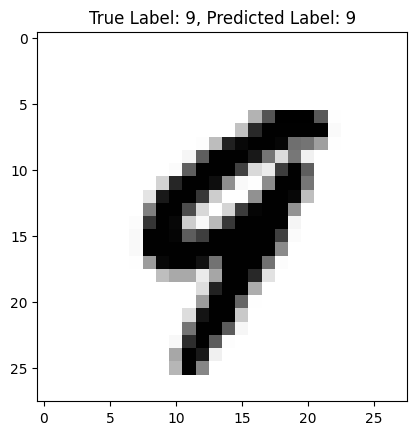

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Choose an image from the test set (let's pick the first one for example)
image = x_test[5100:5101]  # Selecting the first test image
true_label = y_test[5100]  # The true label for that image

# Predict using the model
predictions = model(image)

# Apply softmax to get probabilities
predicted_probabilities = tf.nn.softmax(predictions).numpy()

# Get the predicted class (digit)
predicted_label = np.argmax(predicted_probabilities)

# Display the image and predictions
plt.imshow(image[0], cmap=plt.cm.binary)  # Display the image
plt.title(f"True Label: {true_label}, Predicted Label: {predicted_label}")
plt.show()


In [14]:
probability_model = tf.keras.Sequential([  model, tf.keras.layers.Softmax()])
probability_model(x_test[:5])
# This wraps your trained model with an extra Softmax layer, creating a new model (probability_model) that:
# Takes in the same inputs (e.g. an image),
# Runs them through your trained model, which outputs logits (raw scores),
# Then applies softmax to convert those logits into probabilities (all between 0 and 1, and summing to 1).
#
# The original model ends with: tf.keras.layers.Dense(10)
# That gives raw scores like: [2.1, 0.3, -1.5, 5.0, ...]
# The Softmax turns those into: [0.02, 0.01, 0.001, 0.96, ...]
# Now you can directly interpret the output as "confidence scores" for each digit (0–9).
# probability_model(x_test[:5]) Runs the first 5 test images through the combined model.
# Outputs a (5, 10) NumPy array: 5 rows (one per image), 10 columns (one for each digit class), Each row shows the predicted probabilities for the digits 0 through 9.
#
# You're making a new version of the model that automatically gives probabilities instead of logits, which is cleaner for things like:
# Displaying confidence values,
# Making decisions (e.g. pick the class with highest probability),
# Interpreting predictions.


<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[2.8077278e-07, 5.6824287e-08, 4.8644808e-05, 2.8779116e-04,
        5.1720447e-12, 6.0102184e-07, 8.7035000e-14, 9.9964714e-01,
        8.8075456e-07, 1.4437323e-05],
       [4.1962377e-07, 2.9546165e-05, 9.9996781e-01, 1.3904071e-06,
        2.5379002e-16, 2.6647955e-08, 1.4233917e-08, 1.1189667e-12,
        7.0822966e-07, 6.7890348e-14],
       [4.3210150e-08, 9.9950910e-01, 7.3935778e-05, 3.7460893e-07,
        1.7463393e-06, 5.6157540e-07, 2.4017229e-06, 3.8383782e-04,
        2.7791331e-05, 7.5136015e-08],
       [9.9988878e-01, 4.1013437e-09, 6.3434891e-05, 8.7420591e-07,
        6.6970762e-09, 2.3950846e-05, 1.6610862e-05, 4.8519892e-06,
        2.3369175e-07, 1.2217046e-06],
       [1.0684367e-05, 2.4068841e-11, 7.3310724e-07, 6.5666036e-08,
        9.9868172e-01, 4.3162547e-07, 7.8268677e-06, 1.4387441e-05,
        4.7832455e-06, 1.2792808e-03]], dtype=float32)>

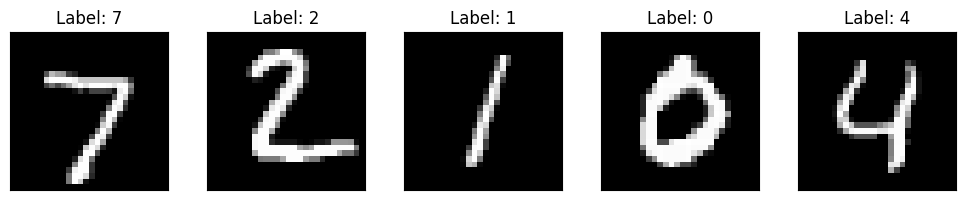

In [15]:
import matplotlib.pyplot as plt

# Plot the first 5 test images
plt.figure(figsize=(10, 2))  # Make the figure wider

for i in range(5):
    plt.subplot(1, 5, i + 1)  # 1 row, 5 columns
    plt.xticks([])            # Remove x-axis ticks
    plt.yticks([])            # Remove y-axis ticks
    plt.grid(False)           # Remove grid
    plt.imshow(x_test[i], cmap='gray')  # Show grayscale image
    plt.title(f"Label: {y_test[i]}")    # True label

plt.tight_layout()
plt.show()


Saving MyImage.jpeg to MyImage.jpeg


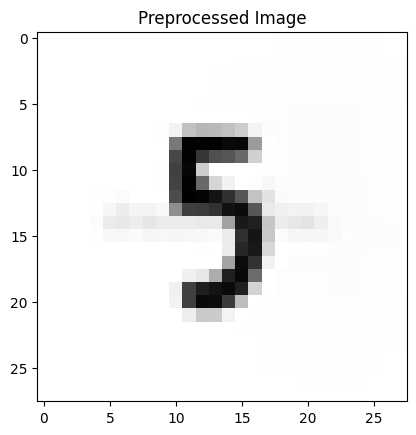

Predicted digit: 5


In [16]:
from google.colab import files
uploaded = files.upload()

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load and convert the image to grayscale
img = Image.open("MyImage.jpeg").convert("L")  # "L" mode = grayscale

# Resize to 28x28 (MNIST format)
img = img.resize((28, 28))

# Invert colors (MNIST digits are white on black)
img = np.invert(np.array(img))

# Normalize pixel values (0–1)
img = img / 255.0

# Reshape for model input (1 image of 28x28)
img = img.reshape(1, 28, 28)

# Show the image
plt.imshow(img[0], cmap='gray')
plt.title("Preprocessed Image")
plt.show()

# Run the image through the trained model
pred = model(img)

# Convert logits to probabilities
probabilities = tf.nn.softmax(pred).numpy()

# Get predicted digit
predicted_digit = np.argmax(probabilities)

print(f"Predicted digit: {predicted_digit}")

## Conclusion

Congratulations! You have trained a machine learning model using a prebuilt dataset using the [Keras](https://www.tensorflow.org/guide/keras/overview) API.

For more examples of using Keras, check out the [tutorials](https://www.tensorflow.org/tutorials/keras/). To learn more about building models with Keras, read the [guides](https://www.tensorflow.org/guide/keras). If you want learn more about loading and preparing data, see the tutorials on [image data loading](https://www.tensorflow.org/tutorials/load_data/images) or [CSV data loading](https://www.tensorflow.org/tutorials/load_data/csv).
